# toyota corolla problem Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
#import statsmodels.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import dataset

toyota= pd.read_csv("ToyotaCorolla.csv",encoding = 'latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA PART

In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota2 = pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
toyo3=toyota
toyo3

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# renaming the columns

toyo3 = toyota2.rename({'Age_08_04':'Age', 'cc':'CC', 'Quarterly_Tax':'Qt'},axis=1) 
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
# find and remove the duplicate values 

toyo3[toyo3.duplicated()]
toyo3


,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyo4 = toyo3.drop_duplicates().reset_index(drop=True)
toyo4

,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [9]:
toyo4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# corelation finding 

In [10]:
toyo4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Qt,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


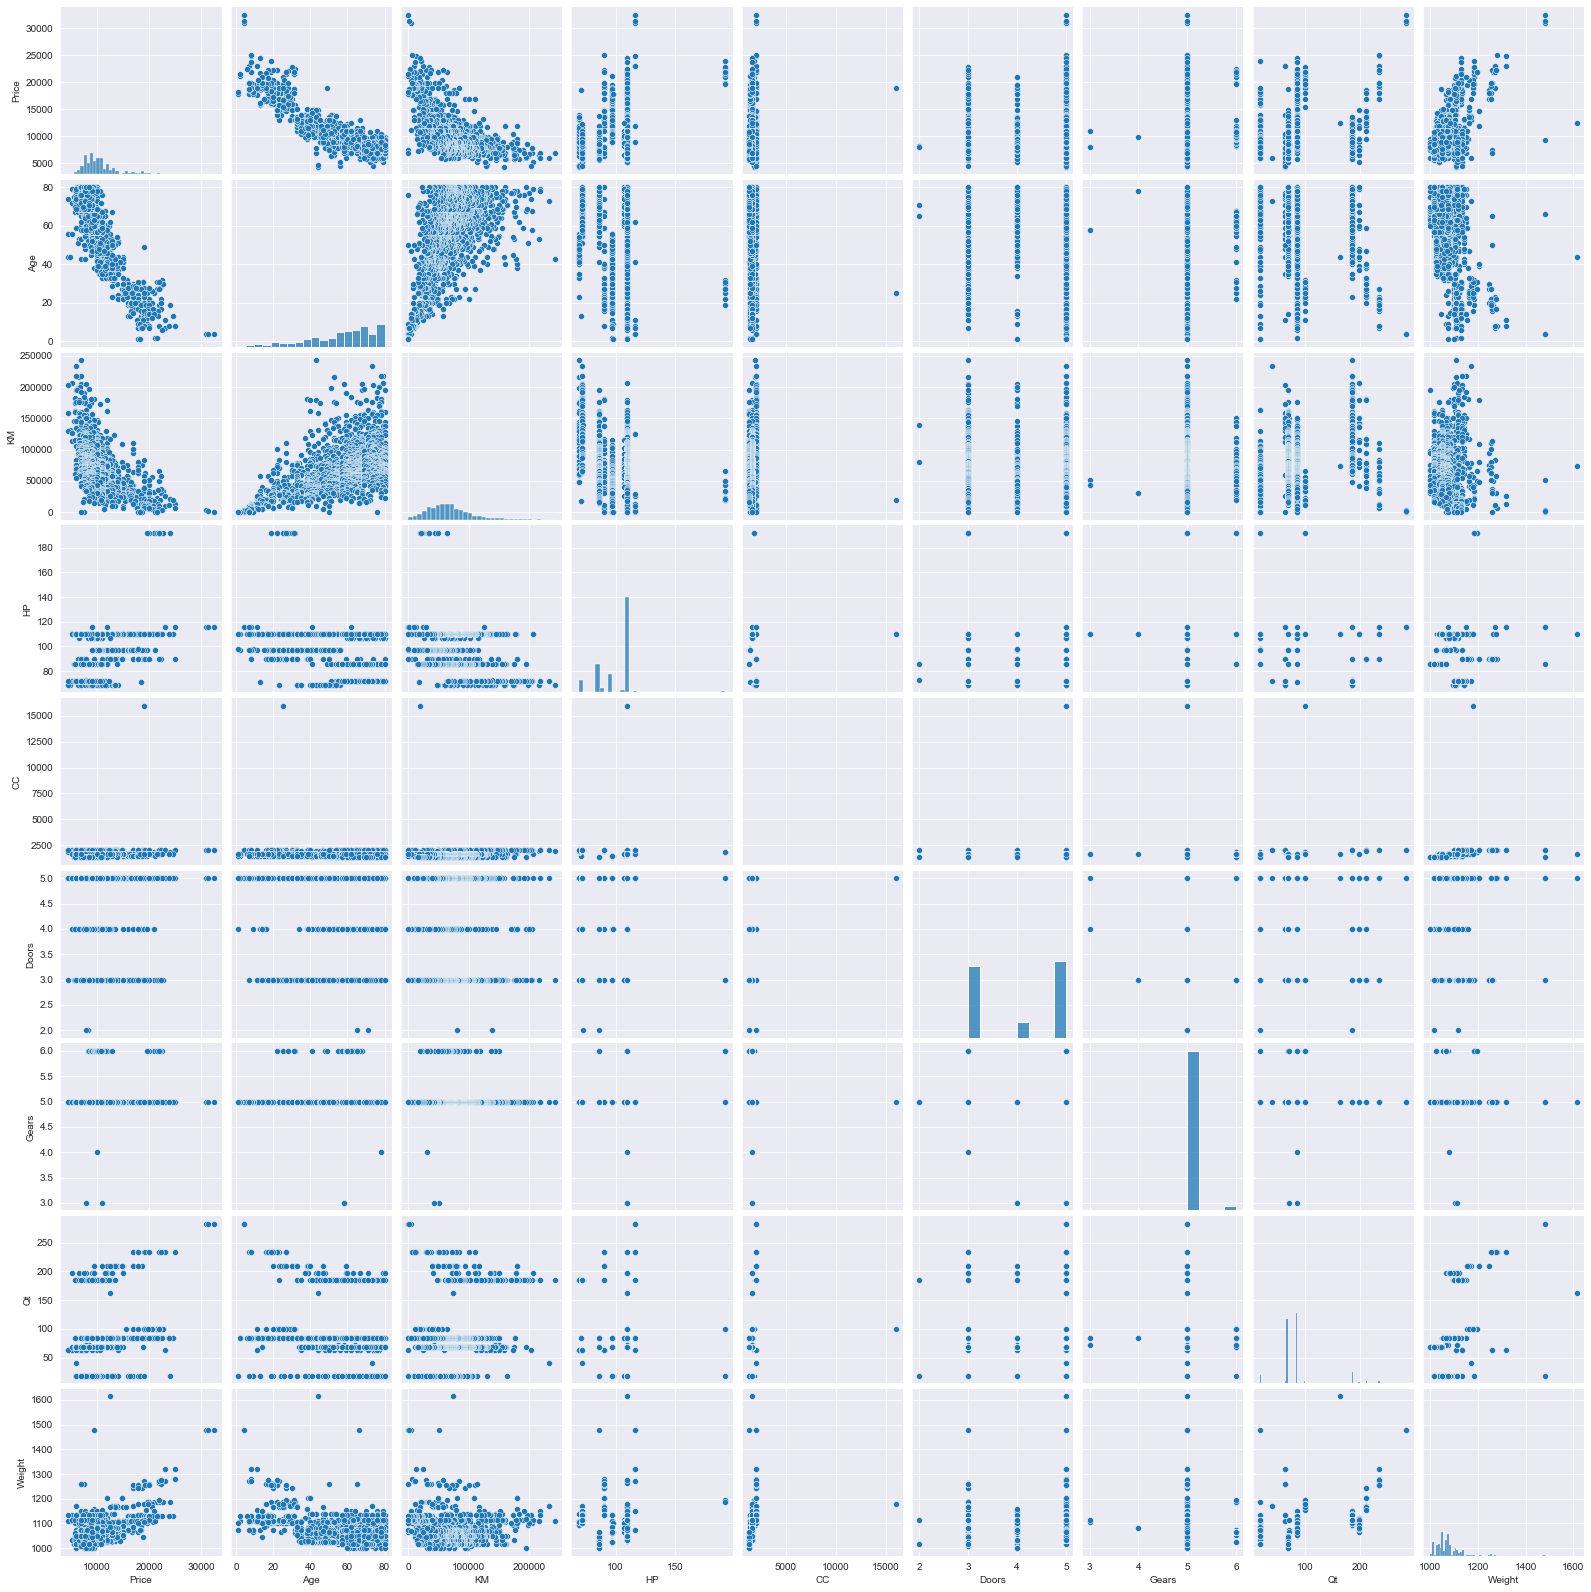

In [11]:
sns.set_style(style="darkgrid")
sns.pairplot(toyo4)


# building the model

In [12]:
model= smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Qt+Weight",data=toyo4).fit()

# testing the models


In [13]:
# finding coefficent parametrs
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
Qt              3.858805
Weight         16.855470
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:44:59   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Qt             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# simple linear regression models

In [15]:
# build SLR nad MLR models for insignificient variable CC and Doors
# with t and p value

In [16]:
ml_r = smf.ols('Price~CC',data=toyo4).fit()
ml_r.tvalues , ml_r.pvalues 

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [17]:
ml_rb = smf.ols('Price~Doors',data = toyo4).fit()
ml_rb.tvalues , ml_r.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [18]:
ml_rb = smf.ols('Price~CC+Doors', data = toyo4).fit()
print(ml_rb.tvalues , '\n', ml_rb.pvalues)

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


# Calculating VIF

In [19]:
rsq_Price = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qt+Weight',data=toyo4).fit().rsquared
vif_Price = 1/(1-rsq_Price)

rsq_Age = smf.ols('Age~Price+KM+HP+CC+Doors+Gears+Qt+Weight',data=toyo4).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+Price+HP+CC+Doors+Gears+Qt+Weight',data=toyo4).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+Price+CC+Doors+Gears+Qt+Weight',data=toyo4).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CC = smf.ols('CC~Age+KM+HP+Price+Doors+Gears+Qt+Weight',data=toyo4).fit().rsquared
vif_CC = 1/(1-rsq_CC)

rsq_Doors = smf.ols('Doors~Age+KM+HP+CC+Price+Gears+Qt+Weight',data=toyo4).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+CC+Doors+Price+Qt+Weight',data=toyo4).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Qt = smf.ols('Qt~Age+KM+HP+CC+Doors+Gears+Price+Weight',data=toyo4).fit().rsquared
vif_Qt = 1/(1-rsq_Qt)

rsq_Weight = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Qt+Price',data=toyo4).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)


# storing vif values in a dataframe

d1 = {'Variable': ['Price','Age','KM','HP','CC','Doors','Gears','Qt','Weight'],'VIF':[ vif_Price,vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_Qt,vif_Weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variable,VIF
0,Price,7.273787
1,Age,4.727532
2,KM,2.094791
3,HP,1.544237
4,CC,1.164884
5,Doors,1.155890
6,Gears,1.105939
7,Qt,2.309328
8,Weight,2.920428


# Residual Analysis



# normality of Residuals(Q-Q plot)

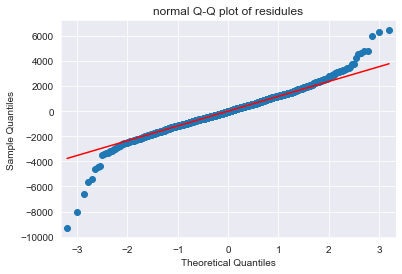

In [20]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') # line =45 to draw the diagonal line
plt.title("normal Q-Q plot of residules")
plt.show()


In [21]:
list(np.where(model.resid>10))


[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  117,  118,  119,  120,  122,  124,  125,  126,
         127,  133,  135,  137,  138,  140,  141,  142,  143,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  155,  156,  157,  158,
         159,  160,  161,  162,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  189,  193,  195,  196,  200,  203,  204,  209,  210,  215,
         222,  229,  231,  232,  236, 

# Residual plot for Homoscedasticity

In [22]:
def get_standardized_values( vals):
    return(vals - vals.mean())/vals.std()

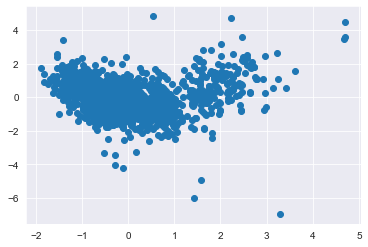

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

# Residuals vs Regressors

In [24]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# this is for independant variable

eval_env: 1


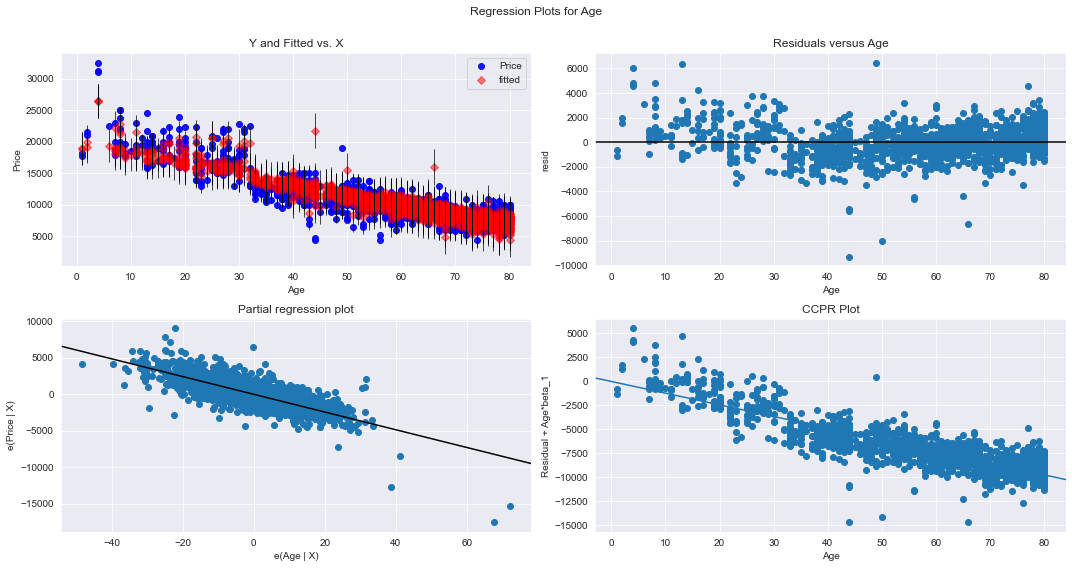

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age', fig = fig)
plt.show()

eval_env: 1


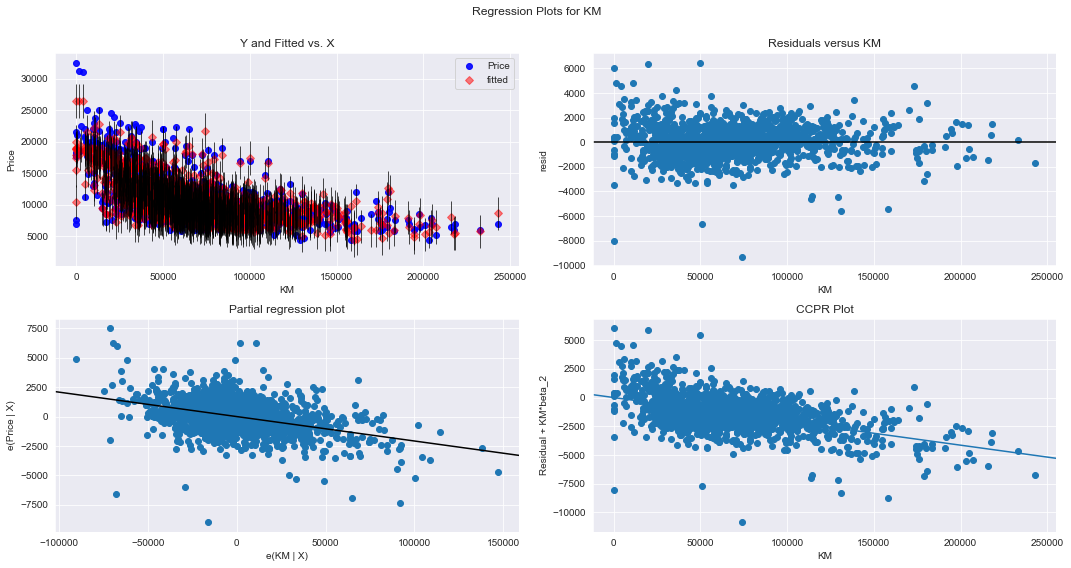

In [26]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM', fig = fig)
plt.show()

eval_env: 1


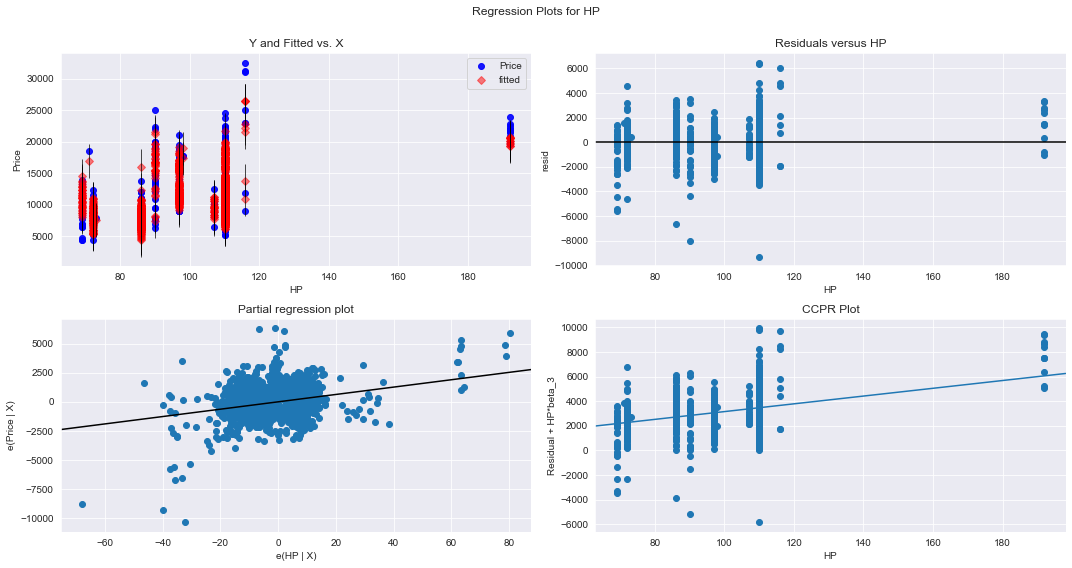

In [27]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP', fig = fig)
plt.show()

eval_env: 1


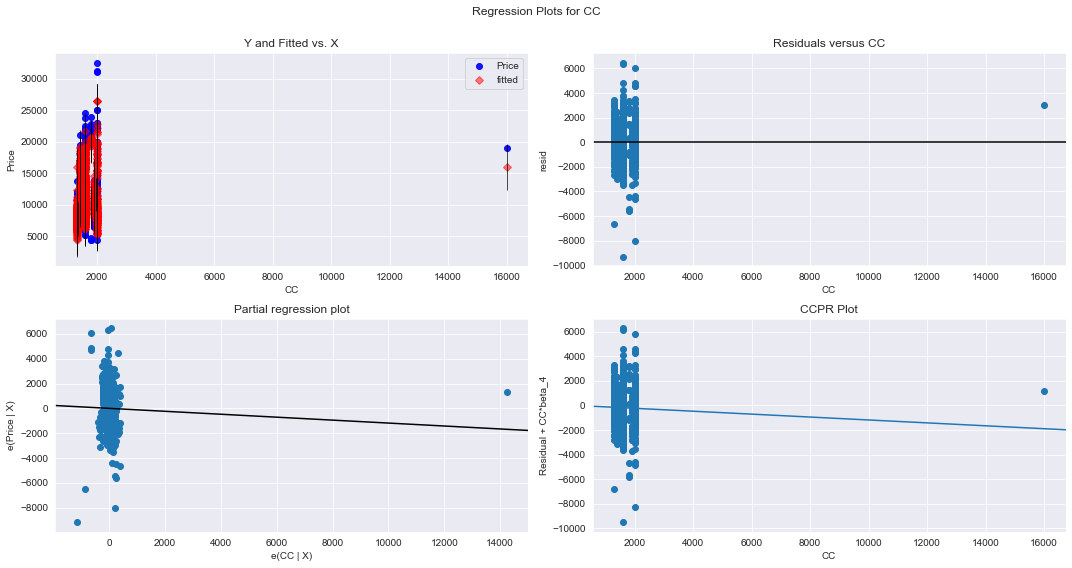

In [28]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC', fig = fig)
plt.show()

eval_env: 1


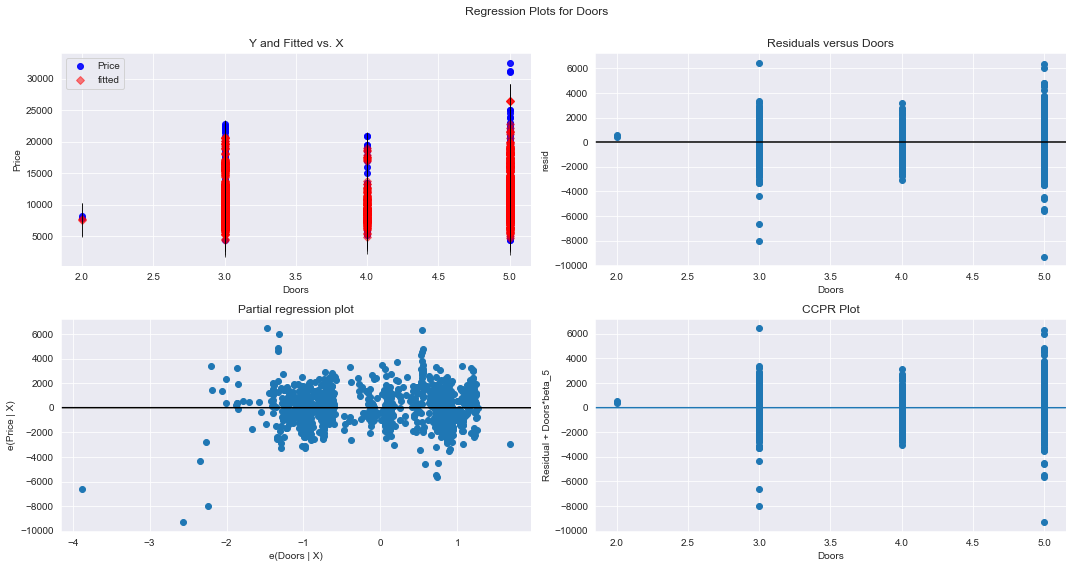

In [29]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors', fig = fig)
plt.show()

eval_env: 1


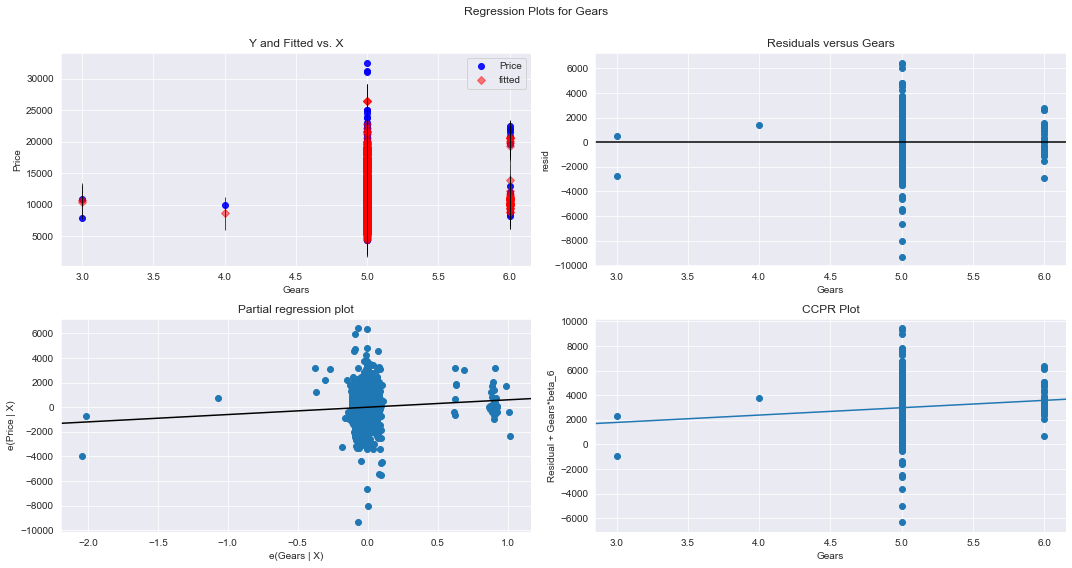

In [30]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears', fig = fig)
plt.show()

eval_env: 1


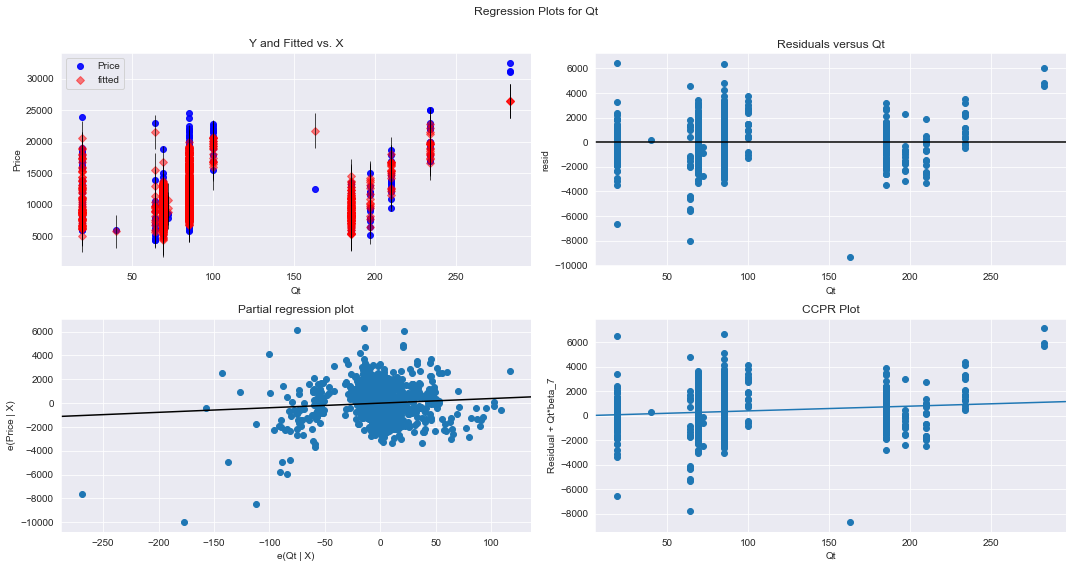

In [31]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Qt', fig = fig)
plt.show()

eval_env: 1


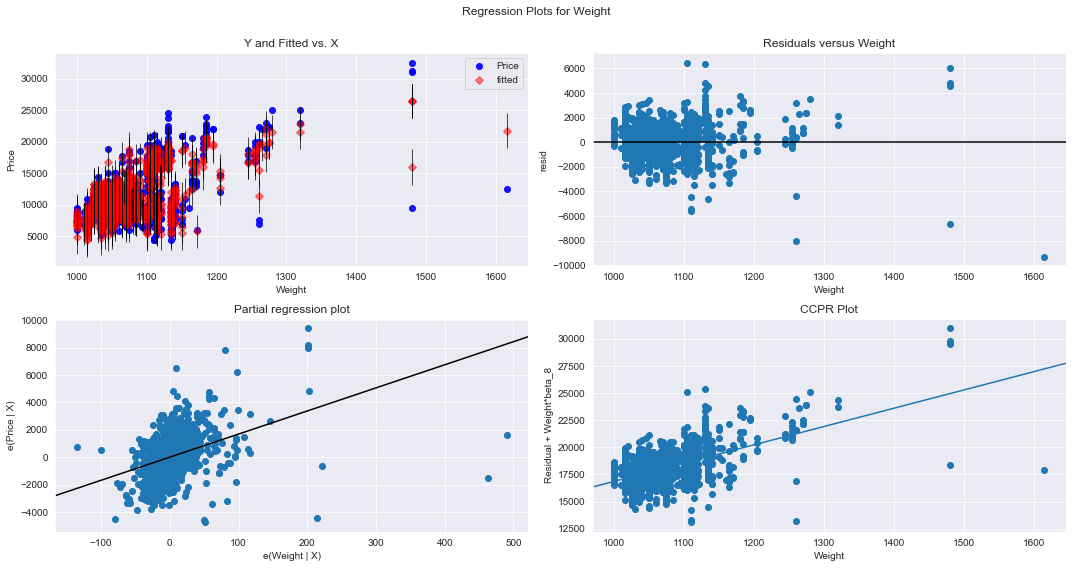

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight', fig = fig)
plt.show()

# model Deletion diagnostics

# detecting influencers/outliers

# cook's Distance

In [33]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

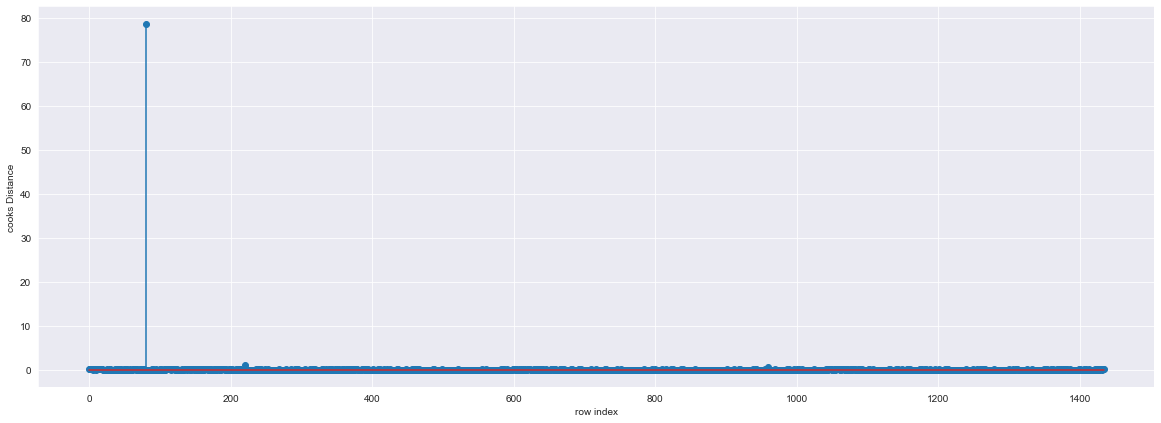

In [34]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo4)),np.round(c,3))
plt.xlabel("row index")
plt.ylabel('cooks Distance')
plt.show()

In [35]:
# index and value of influencer where c>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058225869)

# HIGH influence points

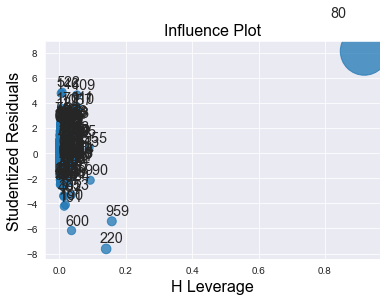

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
k = toyo4.shape[1]
n = toyo4.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [38]:
toyo4[toyo4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# improving the model 

In [39]:
# creating a copy of data so that orignal data cant be changed 
toyo_new=toyo4.copy()
toyo_new

,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [40]:
# discard the data points which are influncer and reasign the row number (reset_index())

toyo5= toyo_new.drop(toyo_new.index[80],axis=0).reset_index(drop=True)
toyo5

,Price,Age,KM,HP,CC,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# build the model

In [41]:
# build the model on the new data
final_ml_V= smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Qt+Weight",data = toyo5).fit()

In [42]:
# again cheak for the influencer 

model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

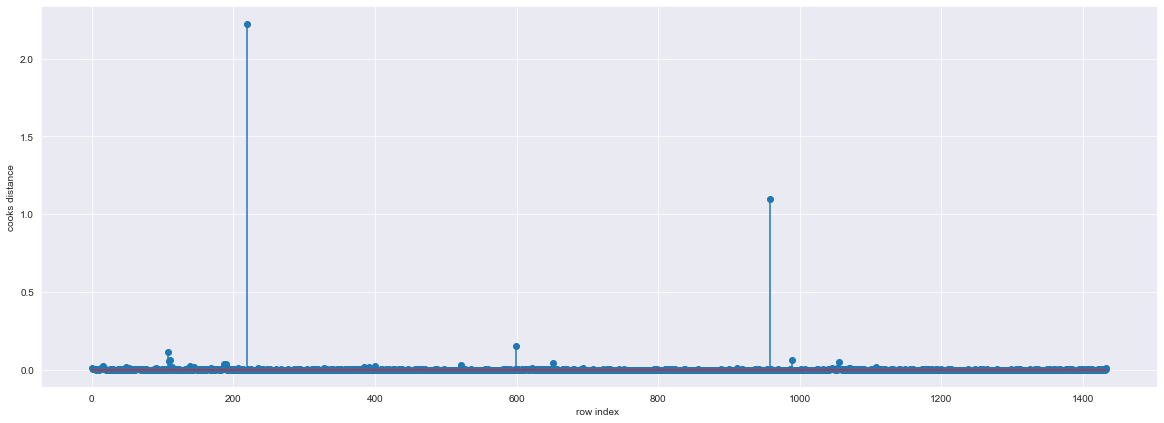

In [43]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo5)),np.round(c_V,3));
plt.xlabel('row index ')
plt.ylabel('cooks distance');

In [44]:
# index of data points where c is more than 0.5
(np.argmax(c_V),np.max(c_V))

(219, 2.2253513655271333)

# sience the value is <1 we can stop the diagnostic process and finalized th emodel 

In [46]:
# cheak the accuracy of the mode 
final_ml_V = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Qt+Weight",data = toyo5).fit()

In [47]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8681163912634053, 24669.363894157)

# lets try with new data 

In [48]:
new_data=pd.DataFrame({'Age':11,"KM":30000,"HP":3450,"CC":2300,"Doors":2,"Gears":8,"Qt":89,"Weight":1387},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Qt,Weight
0,11,30000,3450,2300,2,8,89,1387


In [49]:
# manual prediction of price 
final_ml_V.predict(new_data)

0    154283.757244
dtype: float64

In [50]:
pred_y = final_ml_V.predict(toyo5)
pred_y     # this are the pricing for the new model 


0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64